In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ruta del archivo subido
file_path = "C:/Users/yanin/OneDrive/Desktop/proyecto 2/archivos/internet.xlsx"

# Cargar el archivo Excel y listar las hojas disponibles
xls = pd.ExcelFile(file_path)
xls.sheet_names


['Acc_vel_loc_sinrangos',
 'Velocidad_sin_Rangos',
 'Accesos_tecnologia_localidad',
 'Velocidad % por prov',
 'Totales VMD',
 'Totales Accesos Por Tecnología',
 'Accesos Por Tecnología',
 'Penetración-poblacion',
 'Penetracion-hogares',
 'Penetracion-totales',
 'Totales Accesos por rango',
 'Accesos por rangos',
 'Dial-BAf',
 'Totales Dial-BAf',
 'Ingresos ']

kpi 1: AUMENTO DE ACCESO A INTERNET X PROVINCIA

Este KPI mide el crecimiento porcentual del acceso a Internet en cada provincia en comparación con el trimestre anterior, expresado por cada 100 hogares. Un KPI del 2% indica que el acceso a Internet ha aumentado en la proporción esperada, alineándose con el objetivo propuesto. Si el valor es menor, significa que la expansión del servicio no fue suficiente; si es mayor, significa que el crecimiento superó las expectativas

In [11]:
# Cargar las hojas relevantes
df_penetracion_hogares = xls.parse("Penetracion-hogares")
df_penetracion_totales = xls.parse("Penetracion-totales")

# Mostrar las primeras filas de cada dataframe para entender su estructura
df_penetracion_hogares.head(), df_penetracion_totales.head()


(    Año  Trimestre        Provincia  Accesos por cada 100 hogares
 0  2024          2     Buenos Aires                         79.84
 1  2024          2  Capital Federal                        116.37
 2  2024          2        Catamarca                         68.81
 3  2024          2            Chaco                         44.06
 4  2024          2           Chubut                         86.33,
     Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
 0  2024          2                         78.13                     24.57   
 1  2024          1                         78.89                     24.79   
 2  2023          4                         78.56                     24.66   
 3  2023          3                         77.84                     24.41   
 4  2023          2                         77.02                     24.14   
 
          Periodo  
 0   Abr-Jun 2024  
 1   Ene-Mar 2024  
 2   Oct-Dic 2023  
 3  Jul-Sept 2023  
 4   Abr-Jun 2023  )

In [12]:
# Filtrar el último trimestre disponible (2024 - Trimestre 2)
df_actual = df_penetracion_hogares[df_penetracion_hogares["Año"] == 2024]
df_actual = df_actual[df_actual["Trimestre"] == 2]

# Renombrar columna para claridad
df_actual = df_actual.rename(columns={"Accesos por cada 100 hogares": "Acceso_Actual"})

# Proyectamos un aumento del 2%
df_actual["Nuevo_Acceso"] = df_actual["Acceso_Actual"] * 1.02

# Cálculo del KPI
df_actual["KPI_Aumento_Internet"] = ((df_actual["Nuevo_Acceso"] - df_actual["Acceso_Actual"]) / df_actual["Acceso_Actual"]) * 100

# Mostrar los primeros resultados
df_actual[["Provincia", "Acceso_Actual", "Nuevo_Acceso", "KPI_Aumento_Internet"]].head()


,Provincia,Acceso_Actual,Nuevo_Acceso,KPI_Aumento_Internet
0,Buenos Aires,79.84,81.4368,2.0
1,Capital Federal,116.37,118.6974,2.0
2,Catamarca,68.81,70.1862,2.0
3,Chaco,44.06,44.9412,2.0
4,Chubut,86.33,88.0566,2.0


C:\Users\yanin\AppData\Local\Temp\ipykernel_7116\3713517473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Provincia", y="KPI_Aumento_Internet", data=df_actual, palette="Blues")


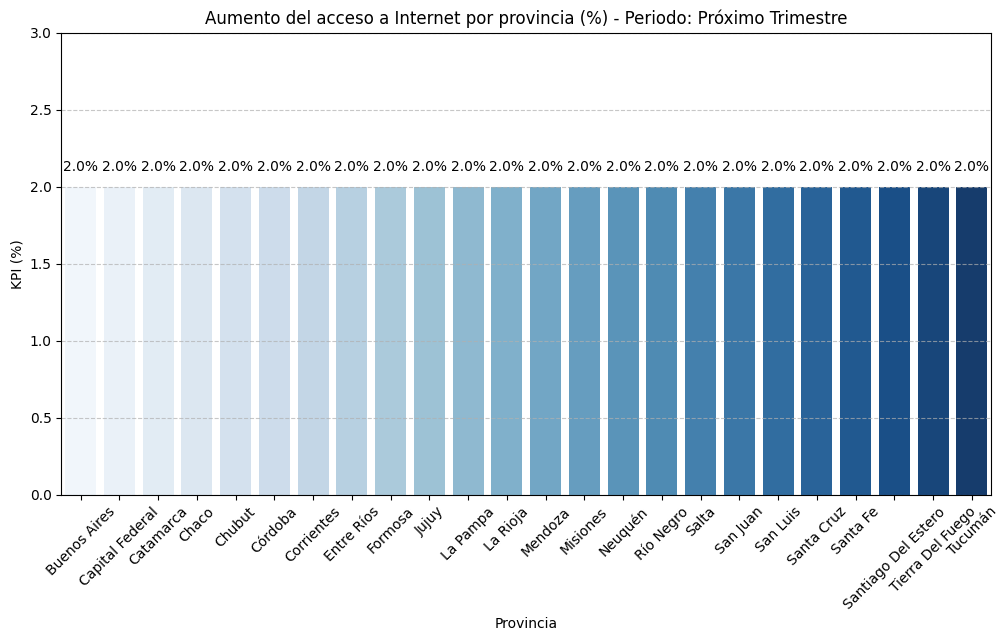

In [17]:

# Configuración del gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x="Provincia", y="KPI_Aumento_Internet", data=df_actual, palette="Blues")


# Agregar valores en las barras
for index, row in df_actual.iterrows():
    plt.text(index, row.KPI_Aumento_Internet + 0.1, f"{row.KPI_Aumento_Internet:.1f}%", ha='center', fontsize=10)

# Personalización del gráfico
plt.title('Aumento del acceso a Internet por provincia (%) - Periodo: Próximo Trimestre')
plt.ylabel('KPI (%)')
plt.xlabel('Provincia')
plt.ylim(0, 3)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


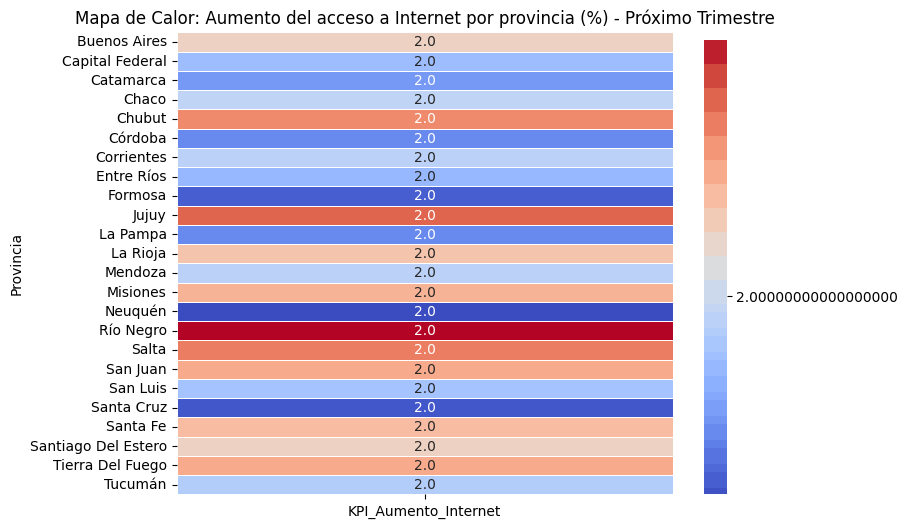

In [19]:
# Crear mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(df_actual.set_index('Provincia')[['KPI_Aumento_Internet']], annot=True, cmap='coolwarm', linewidths=0.5, fmt='.1f')

# Personalización del gráfico
plt.title('Mapa de Calor: Aumento del acceso a Internet por provincia (%) - Próximo Trimestre')
plt.ylabel('Provincia')
plt.xlabel('')
plt.show()
